<a href="https://colab.research.google.com/github/phuongnguyen99/Spring22_Porject_Math/blob/main/Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all necessary libraries
import cv2
import os
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb

  
# Read the video from specified path
cam = cv2.VideoCapture("sample_data/new_data.mp4")
  
try:
      
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  
# frame
currentframe = 0
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

In [ ]:
import glob 
import numpy as np
import os
from skimage.io import imshow, imread

img_dir = "data" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 


In [ ]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

width = 1028
height = 1028

#Load image by Opencv2

def img_tensor(original_img):
  """ This function is used to read image and convert it into tensor
  - Input:
      original_img: original image 
  - Output:
      image in rgb and its tensor in rgb
  """
  # read image
  img = cv2.imread(original_img)
  # resize
  inp = cv2.resize(img, (width , height ))
  # convert img to RGB
  rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)
  # convert to uint8
  rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)
  rgb_tensor = tf.expand_dims(rgb_tensor , 0)
  return rgb, rgb_tensor

In [ ]:
rgb, rgb_tensors = img_tensor(files[100])

In [ ]:
# Loading model directly from TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

# Loading csv with labels of classes
labels = pd.read_csv('labels.csv', sep=';', index_col='ID')
labels = labels['OBJECT (2017 REL.)']

In [ ]:
# Creating prediction
boxes, scores, classes, num_detections = detector(rgb_tensors)

# Processing outputs
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

# Putting the boxes and labels on the image
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    score_txt = f'{100 * round(score)}%'
    img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)


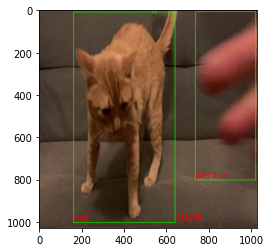

In [ ]:
plt.imshow(img_boxes)